In [6]:
import pandas as pd
import os
from pandas.tseries.offsets import YearEnd

## 1) Get and Check Data

### 1-1) WorldBank Open Data

In [55]:
def load_world_bank_data(filepath, col_name, countries = ['KOR','CAN']):
    df = pd.read_excel(filepath, sheet_name = 'Data', skiprows = 3)
    df = df.set_index('Country Code')
    tmp_df = []
    for country in countries:
        cntry_df = df.loc[country].to_frame()
        cntry_df = cntry_df.iloc[3:]
        cntry_df = cntry_df.dropna()
        cntry_df[country] = cntry_df[country].astype('float')
        cntry_df['date'] = pd.to_datetime(cntry_df.index) + YearEnd(0) # 자동으로 날짜별로 게산  + 연말일자 
        cntry_df = cntry_df.set_index('date')
        cntry_df.columns = [col_name + '_' + country]
        tmp_df.append(cntry_df)
    result_df = pd.concat(tmp_df, axis = 1)
    return result_df

In [109]:
df1 = load_world_bank_data('./data/wb/GDP.xls', 'GDP', ['KOR','CAN','USA'])
df2 = load_world_bank_data('./data/wb/GDP_growth.xls', 'GDP_GROWTH', ['KOR','CAN','USA'])
df3 = load_world_bank_data('./data/wb/PPP_XR.xls', 'PPP_XR', ['KOR','CAN','USA'])
df4 = load_world_bank_data('./data/wb/GDP_per_capita_growth.xls', 'GDP/CAPITA_GROWTH', ['KOR','CAN','USA'])

In [110]:
wb_df_dict = {'GDP':df1, 'GDP_GROWTH':df2, 'PPP_XR':df3, 'GDP/CAPITA_GROWTH': df4}

> GDP, GDP증감, PPP_XR, 인구증가율 대비 GDP 4개 항목 입수 

In [76]:
import matplotlib.pyplot as plt

In [119]:
plt.rcParams['font.size'] = 8

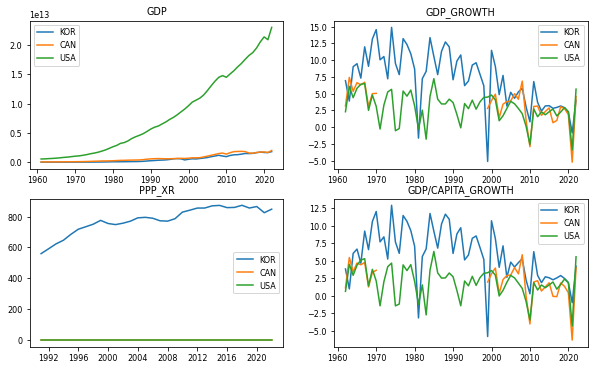

In [120]:
plt.subplots(2,2, figsize = (10,6))
for i, k in enumerate(wb_df_dict.keys()):
    plt.subplot(2,2,i+1)
    label = [col.replace(k+'_','') for col in wb_df_dict[k].columns]
    plt.plot(wb_df_dict[k], label = label)
    plt.legend()
    plt.title(k)
plt.show()

> 연도별 데이터로 보유 시점이 각각 다르므로 모든 기간 보유한 시점으로 확인 

In [165]:
wb_df = pd.merge(df1, df2, left_index = True, right_index = True, how = 'left')
wb_df = pd.merge(wb_df, df3, left_index = True, right_index = True, how = 'left')
wb_df = pd.merge(wb_df, df4, left_index = True, right_index = True, how = 'left')

In [166]:
import seaborn as sns

<AxesSubplot:ylabel='date'>

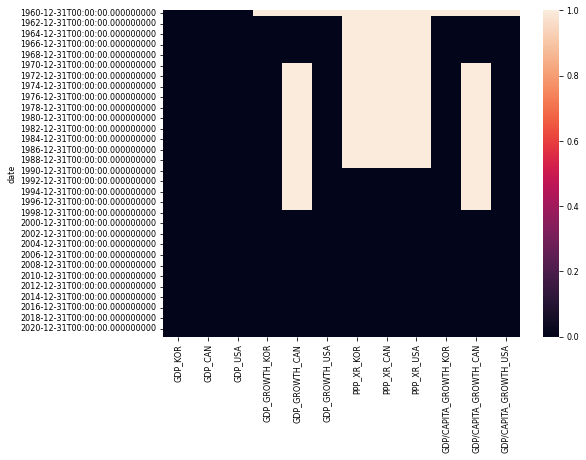

In [170]:
plt.figure(figsize = (8,6))
sns.heatmap(wb_df.isnull())

> 대충 이런 결측친데 IMF & CAN GDP 시점으로 99년도 정도부터 쓰면될것 처럼 보임  

In [171]:
wb_df.dropna(inplace = True)

In [172]:
wb_df.head(3)

,GDP_KOR,GDP_CAN,GDP_USA,GDP_GROWTH_KOR,GDP_GROWTH_CAN,GDP_GROWTH_USA,PPP_XR_KOR,PPP_XR_CAN,PPP_XR_USA,GDP/CAPITA_GROWTH_KOR,GDP/CAPITA_GROWTH_CAN,GDP/CAPITA_GROWTH_USA
date,,,,,,,,,,,,
1998-12-31,3.833309e+11,6.340000e+11,9.062818e+12,-5.129448,2.796542,4.481394,775.063070,1.185044,1.0,-5.811820,1.946955,3.270511
1999-12-31,4.975127e+11,6.784122e+11,9.631174e+12,11.466942,3.970483,4.794499,754.892970,1.190810,1.0,10.677451,3.128792,3.597985
2000-12-31,5.761781e+11,7.447734e+11,1.025095e+13,9.060833,4.917763,4.077159,747.736794,1.227599,1.0,8.152690,3.945219,2.925441


> GDP 항목은 직접 사용하진 않지만 growth 검증을 위해 냅두기로..  

In [174]:
wb_df.to_excel('./data/full_wb.xlsx')

In [3]:
os.listdir('./data/ds')

['DeepSearch-Chart-Export-Market Yield on U S  Treasury Securities at 1-Year Constant Maturity  Quoted on an Investment Basis.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 경상수지 - 미국.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 경상수지 - 캐나다.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 생산자물가지수 - 미국.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 생산자물가지수 - 캐나다.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 서비스수지 - 캐나다.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 소비자물가지수 - 미국.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 소비자물가지수 - 캐나다.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 소비자물가지수 - 한국.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 실업률 계절변동조정  - 미국.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 실업률 계절변동조정  - 캐나다.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 실업률 계절변동조정  - 한국.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 외환보유액 - 중국.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 외환보유액 - 캐나다.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 외환보유액 - 한국.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 중앙은행 정책금리 - 미국.xlsx',
 'DeepSearch-Chart-Export-국제 주요국 중앙은행 정책금리 - 캐나다.xlsx',
 'DeepSear